In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import re

### Hypothesis Testing
##### **H0: responders and non-responders tend to have the same age**
#### **Hi: responders and non-responders tend to differ in age**
#### target = 1 are responders
#### target = 0 are non-responders

##### **Data EDA**


In [2]:
data = pd.read_csv("./data.csv")

In [3]:
data.head()

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4000 non-null   int64  
 1   age             4000 non-null   int64  
 2   dist            4000 non-null   float64
 3   income          3703 non-null   object 
 4   gender          3976 non-null   object 
 5   marital_status  3742 non-null   object 
 6   target          4000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 218.9+ KB


In [5]:
data.describe()

,id,age,dist,target
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,76.588500,8.416276,0.250000
std,1154.844867,8.054433,6.785335,0.433067
min,1.000000,65.000000,0.129041,0.000000
25%,1000.750000,70.000000,3.255631,0.000000
50%,2000.500000,76.000000,6.385203,0.000000
75%,3000.250000,83.000000,11.801869,0.250000
max,4000.000000,94.000000,29.958834,1.000000


In [6]:
data.isna().sum()

id                  0
age                 0
dist                0
income            297
gender             24
marital_status    258
target              0
dtype: int64

In [7]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [8]:
a = data['age']
popmean = data['age'].mean()
stats.ttest_1samp(a, popmean=popmean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [9]:
responders_data = data.loc[data['target'] == 1]
non_responders_data = data.loc[data['target'] == 0]

In [10]:
responders_data_age = responders_data['age']
non_responders_data_age = non_responders_data['age']

In [11]:
responders_data_age.head()

0    73
1    89
2    85
3    76
4    76
Name: age, dtype: int64

In [12]:
responders_data.describe()

,id,age,dist,target
count,1000.000000,1000.000000,1000.000000,1000.0
mean,1759.084000,79.336000,8.076130,1.0
std,1187.183013,7.569835,7.080152,0.0
min,1.000000,65.000000,0.131745,1.0
25%,702.750000,74.000000,2.619133,1.0
50%,1659.500000,79.000000,5.668152,1.0
75%,2793.250000,85.000000,11.595245,1.0
max,3977.000000,94.000000,29.884131,1.0


In [13]:
non_responders_data.describe()

,id,age,dist,target
count,3000.000000,3000.000000,3000.000000,3000.0
mean,2080.972000,75.672667,8.529657,0.0
std,1132.683091,8.003845,6.681542,0.0
min,9.000000,65.000000,0.129041,0.0
25%,1135.750000,69.000000,3.468245,0.0
50%,2112.000000,74.000000,6.582842,0.0
75%,3044.250000,81.000000,11.844672,0.0
max,4000.000000,94.000000,29.958834,0.0


In [14]:
responders_data.head()
stats.ttest_1samp(a = responders_data['age'], popmean = responders_data['age'].mean() )

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [15]:
non_responders_data.head()
stats.ttest_1samp(a = non_responders_data['age'], popmean = non_responders_data['age'].mean() )

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

<AxesSubplot:ylabel='Density'>

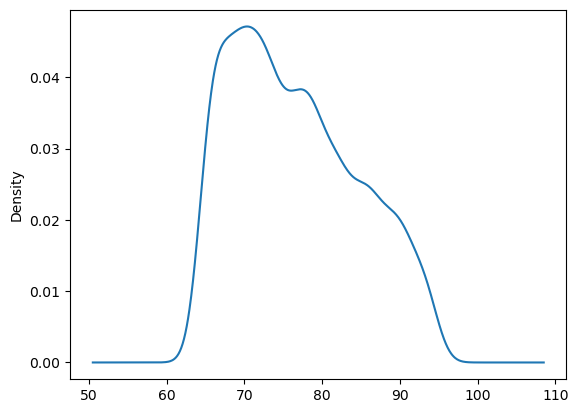

In [16]:
data['age'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

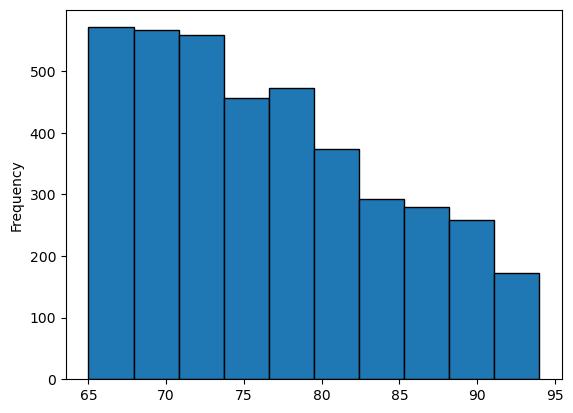

In [17]:
data['age'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

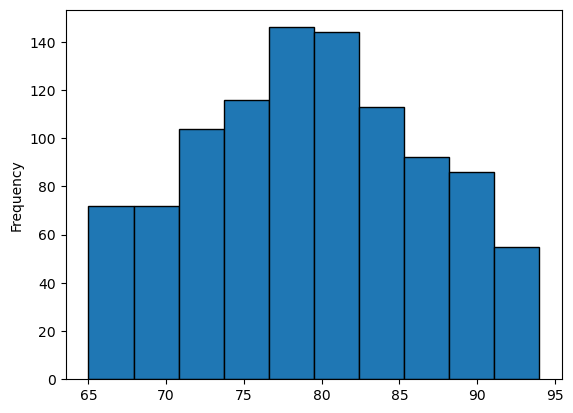

In [18]:
responders_data['age'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

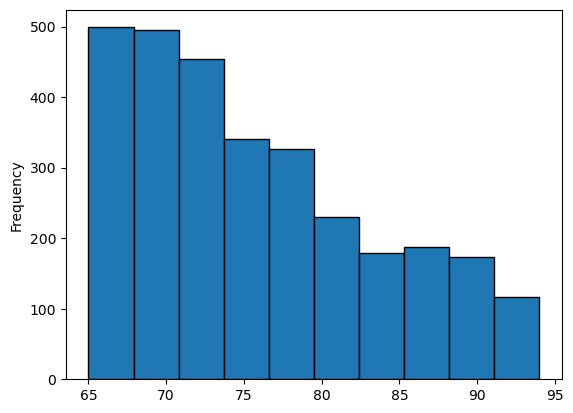

In [19]:
non_responders_data['age'].plot(kind='hist', edgecolor='black')

Text(0.5, 0, 'Age')

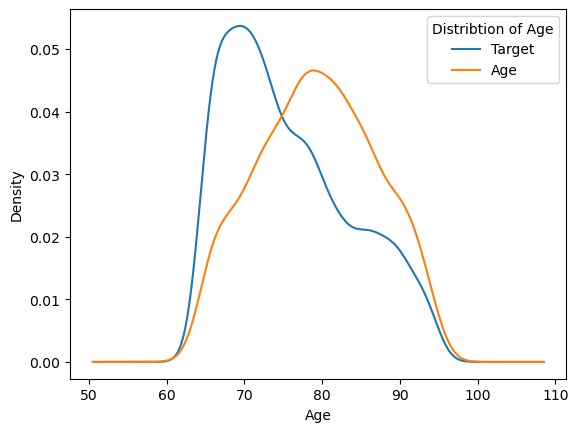

In [20]:
import matplotlib.pyplot as plt

#plot distribution of age
data.groupby('target')['age'].plot(kind='kde')

#add legend
plt.legend(['Target', 'Age'], title='Distribtion of Age')

#add x label
plt.xlabel('Age')

##### **P-Value**

In [21]:
ttest_ind(responders_data_age, non_responders_data_age)

Ttest_indResult(statistic=12.703112333242013, pvalue=2.8300576488693526e-36)

In [22]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis: The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis: The data is normally distributed")

In [23]:
check_normality(responders_data_age)

p value:0.0000
Reject null hypothesis: The data is not normally distributed


In [24]:
check_normality(non_responders_data_age)

p value:0.0000
Reject null hypothesis: The data is not normally distributed


#### **Variance**

In [25]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [26]:
check_variance_homogeneity(responders_data_age, non_responders_data_age)

p value:0.0600
Fail to reject null hypothesis >> The variances of the samples are same.


#### **Feature Engineering**

In [27]:
data.head()

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


In [28]:
data['income floor'] = data['income'].str.split("-").str[0]
data.head()

,id,age,dist,income,gender,marital_status,target,income floor
0,1,73,4.371654,"90-99,999",M,S,1,90
1,2,89,1.582733,"100-149,999",M,NaN,1,100
2,3,85,1.223810,"10-19,999",F,S,1,10
3,4,76,2.962427,"90-99,999",M,M,1,90
4,5,76,2.594408,"10-19,999",M,S,1,10


In [29]:
#pd.options.display.float_format = '{:.3f}'.format

In [30]:
def min_exp(val):
    exp = re.sub('-',' ',val)
    exp = exp.split(" ")
    return exp

In [31]:
def addTrailingZeros():
    if data['income floor'] == '10':
        data['income floor'].str.ljust(6, '0')
    else:
        pass
  #  elif data['income floor'] != '10':
   #      data['income floor'].str.ljust(5, '0')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4000 non-null   int64  
 1   age             4000 non-null   int64  
 2   dist            4000 non-null   float64
 3   income          3703 non-null   object 
 4   gender          3976 non-null   object 
 5   marital_status  3742 non-null   object 
 6   target          4000 non-null   int64  
 7   income floor    3703 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 250.1+ KB


In [33]:
data['income ceiling'] = data['income'].str.split("-").str[1]
data.head()

,id,age,dist,income,gender,marital_status,target,income floor,income ceiling
0,1,73,4.371654,"90-99,999",M,S,1,90,"99,999"
1,2,89,1.582733,"100-149,999",M,NaN,1,100,"149,999"
2,3,85,1.223810,"10-19,999",F,S,1,10,"19,999"
3,4,76,2.962427,"90-99,999",M,M,1,90,"99,999"
4,5,76,2.594408,"10-19,999",M,S,1,10,"19,999"


In [34]:
data['marital status clean'] = data['marital_status']

In [35]:
data['marital status clean'] = data['marital status clean'].fillna("NA")

In [36]:
data['marital status clean'] = data['marital status clean'].replace({"M": 1,'S': 0, "NA": 3})

In [37]:
data.head()

,id,age,dist,income,gender,marital_status,target,income floor,income ceiling,marital status clean
0,1,73,4.371654,"90-99,999",M,S,1,90,"99,999",0
1,2,89,1.582733,"100-149,999",M,NaN,1,100,"149,999",3
2,3,85,1.223810,"10-19,999",F,S,1,10,"19,999",0
3,4,76,2.962427,"90-99,999",M,M,1,90,"99,999",1
4,5,76,2.594408,"10-19,999",M,S,1,10,"19,999",0


In [38]:
nominal_selector = data.select_dtypes( include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n')

income
90-99,999        632
100-149,999      482
10-19,999        457
50-59,999        357
40-49,999        321
70-79,999        282
30-39,999        277
20-29,999        265
60-69,999        175
Under $10k       131
175 - 199,999     87
150 - 174,999     85
250k+             81
200 - 249,999     66
80-89,999          5
Name: income, dtype: int64 

gender
F    2003
M    1973
Name: gender, dtype: int64 

marital_status
M    2419
S    1323
Name: marital_status, dtype: int64 

income floor
90            632
100           482
10            457
50            357
40            321
70            282
30            277
20            265
60            175
Under $10k    131
175            87
150            85
250k+          81
200            66
80              5
Name: income floor, dtype: int64 

income ceiling
99,999      632
149,999     482
19,999      457
59,999      357
49,999      321
79,999      282
39,999      277
29,999      265
69,999      175
 199,999     87
 174,999     85
 249,999    

In [39]:
numberCol = data.select_dtypes( include='number')
for col in numberCol.columns:
  print(col)
  print(numberCol[col].value_counts(), '\n')

id
1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: id, Length: 4000, dtype: int64 

age
65    203
66    202
70    199
72    193
71    186
69    184
68    184
73    179
78    171
74    170
76    167
67    166
79    158
77    143
82    139
80    122
75    119
81    113
86    112
85    102
87     97
83     96
89     95
84     94
90     90
91     74
88     70
94     62
93     57
92     53
Name: age, dtype: int64 

dist
14.882922    2
9.531999     2
8.255428     2
19.817153    2
25.881207    2
            ..
3.102701     1
1.000640     1
3.805018     1
2.068364     1
10.442589    1
Name: dist, Length: 3994, dtype: int64 

target
0    3000
1    1000
Name: target, dtype: int64 

marital status clean
1    2419
0    1323
3     258
Name: marital status clean, dtype: int64 



In [40]:
data['gender'] = data['gender'].replace({"M": 1,'F': 0})

### **New Data**

In [41]:
newData = data[['age', 'dist', 'target', 'gender', 'income floor', 'income ceiling', 'marital status clean']]

In [42]:
newData['gender'] = newData['gender'].fillna(0)

C:\Users\BEEMO\AppData\Local\Temp\ipykernel_24988\3099716534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['gender'] = newData['gender'].fillna(0)


In [43]:
newData['gender'] = newData['gender'].astype(int)

C:\Users\BEEMO\AppData\Local\Temp\ipykernel_24988\3297662939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['gender'] = newData['gender'].astype(int)


In [44]:
newData.head()

,age,dist,target,gender,income floor,income ceiling,marital status clean
0,73,4.371654,1,1,90,"99,999",0
1,89,1.582733,1,1,100,"149,999",3
2,85,1.223810,1,0,10,"19,999",0
3,76,2.962427,1,1,90,"99,999",1
4,76,2.594408,1,1,10,"19,999",0


In [45]:
newData['income ceiling'] = newData['income ceiling'].str.replace(',','')

C:\Users\BEEMO\AppData\Local\Temp\ipykernel_24988\3185307383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['income ceiling'] = newData['income ceiling'].str.replace(',','')


Looks like the only missing values are the ones that are under 10K. Theres a constant increase of values that start at 19,999. Must be values below 10K as stated in income floor.

In [46]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4000 non-null   int64  
 1   dist                  4000 non-null   float64
 2   target                4000 non-null   int64  
 3   gender                4000 non-null   int32  
 4   income floor          3703 non-null   object 
 5   income ceiling        3491 non-null   object 
 6   marital status clean  4000 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 203.2+ KB


In [47]:
newData['income floor'] = newData['income floor'].str.strip()
newData.head()

C:\Users\BEEMO\AppData\Local\Temp\ipykernel_24988\2292263897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newData['income floor'] = newData['income floor'].str.strip()


,age,dist,target,gender,income floor,income ceiling,marital status clean
0,73,4.371654,1,1,90,99999,0
1,89,1.582733,1,1,100,149999,3
2,85,1.223810,1,0,10,19999,0
3,76,2.962427,1,1,90,99999,1
4,76,2.594408,1,1,10,19999,0


In [48]:
newData = newData[['age', 'dist', 'target', 'gender', 'income ceiling', 'marital status clean']]

In [49]:
newData.dropna(subset=['income ceiling'])

,age,dist,target,gender,income ceiling,marital status clean
0,73,4.371654,1,1,99999,0
1,89,1.582733,1,1,149999,3
2,85,1.223810,1,0,19999,0
3,76,2.962427,1,1,99999,1
4,76,2.594408,1,1,19999,0
...,...,...,...,...,...,...
3995,70,3.686587,0,0,99999,1
3996,68,22.916857,0,1,149999,1
3997,76,6.314717,0,1,79999,1
3998,67,7.177391,0,0,149999,1


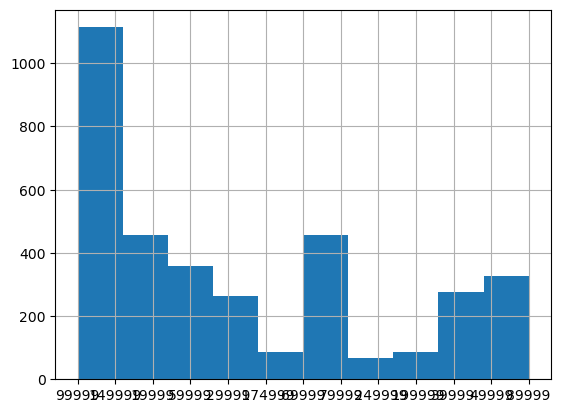

In [50]:
hist = newData['income ceiling'].hist()

In [51]:
newData = newData[newData['income ceiling'].notna()]
newData['income ceiling'].isna().sum()

0

In [52]:
newData['income ceiling'] = newData['income ceiling'].astype(int)

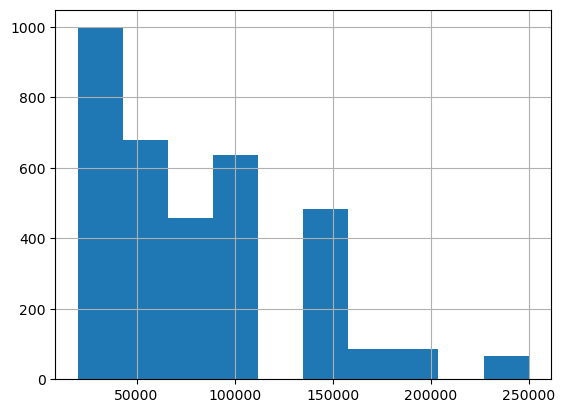

In [53]:
hist2 = newData['income ceiling'].hist()

In [54]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3491 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   3491 non-null   int64  
 1   dist                  3491 non-null   float64
 2   target                3491 non-null   int64  
 3   gender                3491 non-null   int32  
 4   income ceiling        3491 non-null   int32  
 5   marital status clean  3491 non-null   int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 163.6 KB


#### **Pipelining and Encoding Data**

In [55]:
# Sci-kit learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,\
 mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [56]:
X=newData.drop(columns='target')
y = newData['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
nominal_selector = make_column_selector(dtype_include='object')
numeric_selector = make_column_selector(dtype_include='number')

In [58]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [59]:
nominal_pipeline = make_pipeline(missing_imputer, ohe)
numeric_pipeline = make_pipeline(mean_imputer, scaler)

In [60]:
nominal_tup = (nominal_pipeline, nominal_selector)
numeric_tup = (numeric_pipeline, numeric_selector)

In [61]:
preprocessor = make_column_transformer(numeric_tup, nominal_tup, remainder='passthrough')

In [62]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD4D01B80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD66F1520>)])

In [63]:
#Creating a function to evaluate metrics towards prediction

def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
    
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

#### **Logistic Regression**

In [64]:
#KMeans Clustering 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD4D01B80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD66F1520>)])),
                ('logisticregression', LogisticRegression())])

In [66]:
print(f'Training Score:', logreg_pipe.score(X_train, y_train))
print(f' Testing Score:', logreg_pipe.score(X_test, y_test))

Training Score: 0.7291825821237586
 Testing Score: 0.7285223367697594


#### Obtained a testing and training score of 72%

In [67]:
#L1 Tunning
c_valuesl1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scoresl1 = []
test_scoresl1 = []
for c in c_valuesl1: 
  logregl1 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  logregl1_pipe = make_pipeline(preprocessor, logregl1)
  logregl1_pipe.fit(X_train, y_train)
  train_scoresl1.append(logregl1_pipe.score(X_train, y_train))
  test_scoresl1.append(logregl1_pipe.score(X_test, y_test))
{c:score for c, score in zip(c_valuesl1, test_scoresl1)}

{0.0001: 0.7216494845360825,
 0.001: 0.7216494845360825,
 0.01: 0.7216494845360825,
 0.1: 0.7216494845360825,
 1: 0.7285223367697594,
 10: 0.7285223367697594,
 100: 0.7285223367697594,
 1000: 0.7285223367697594}

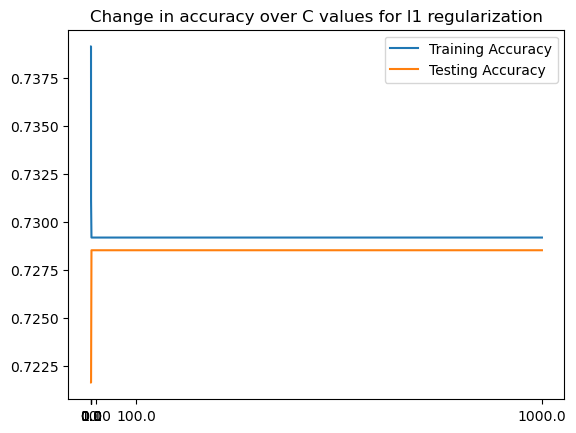

In [68]:
fig, ax = plt.subplots(1,1)
ax.plot(c_valuesl1, train_scoresl1, label='Training Accuracy')
ax.plot(c_valuesl1, test_scoresl1, label='Testing Accuracy')
ax.set_xticks(c_valuesl1)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

In [69]:
#L2 Tunning
c_values2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores2 = []
test_scores2 = []
for c in c_values2: 
  logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  logreg_l2_pipe = make_pipeline(preprocessor, logreg)
  logreg_l2_pipe.fit(X_train, y_train)

  train_scores2.append(logreg_l2_pipe.score(X_train, y_train))
  test_scores2.append(logreg_l2_pipe.score(X_test, y_test))

{c:score for c, score in zip(c_values2, test_scores2)}

{0.0001: 0.7285223367697594,
 0.001: 0.7285223367697594,
 0.01: 0.7285223367697594,
 0.1: 0.7285223367697594,
 1: 0.7285223367697594,
 10: 0.7285223367697594,
 100: 0.7285223367697594,
 1000: 0.7285223367697594}

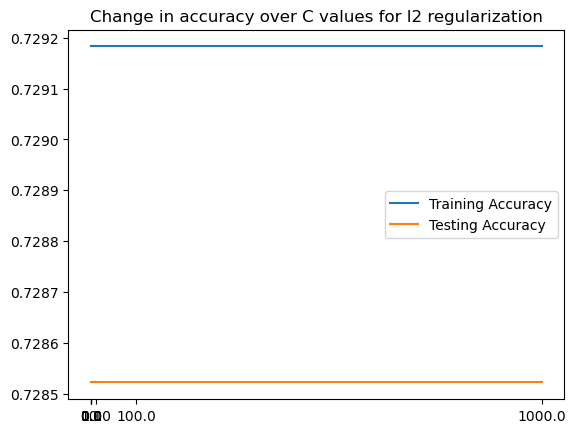

In [70]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values2, train_scores2, label='Training Accuracy')
ax.plot(c_values2, test_scores2, label='Testing Accuracy')
ax.set_xticks(c_values2)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()

False positive is the top right corner
False Negatives is the Bottom Right Corner
True Positives is the Top Left
True Negatives is the Bottom Right






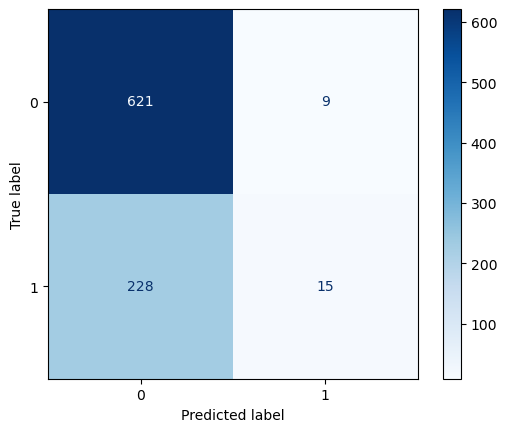

In [71]:
ConfusionMatrixDisplay.from_estimator(logreg_l2_pipe, X_test, y_test, cmap = 'Blues');
print("False positive is the top right corner")
print("False Negatives is the Bottom Right Corner")
print("True Positives is the Top Left")
print("True Negatives is the Bottom Right\n\n\n\n")

#### **PCA Transformation**

In [72]:
pca95 = PCA(n_components=.95)

In [73]:
logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
logreg_l2_pipe = make_pipeline(preprocessor, logreg)
logreg_l2_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD4D01B80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD66F1520>)])),
                ('logisticregression', LogisticRegression())])

In [74]:
logregPreds = logreg_l2_pipe.predict(X_test)
logregPredsAcc = logreg_l2_pipe.score(X_test, y_test)
print(logregPredsAcc)

0.7285223367697594


In [75]:
logreg_l2 = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
logreg_l2_pipe_pca = make_pipeline(preprocessor,pca95, logreg)
logreg_l2_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD4D01B80>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027AD66F1520>)])),
                ('pca', PCA(n_components=0.95)),
                ('logisticregression', LogisticRegression())])

In [76]:
pcalogregPreds = logreg_l2_pipe_pca.predict(X_test)
pcalogregPredsAcc = logreg_l2_pipe_pca.score(X_test, y_test)
print(pcalogregPredsAcc)

0.7285223367697594


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

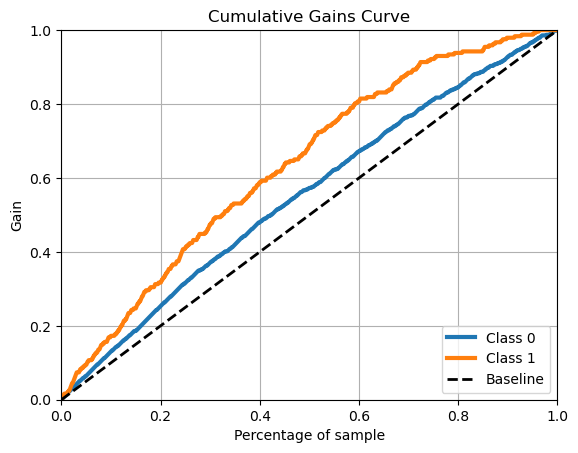

In [78]:
import scikitplot as skplt
# Deriving Class probabilities
predicted_probabilities = logreg_l2_pipe_pca.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

#### **Data Visualization**

In [ ]:
import seaborn as sns

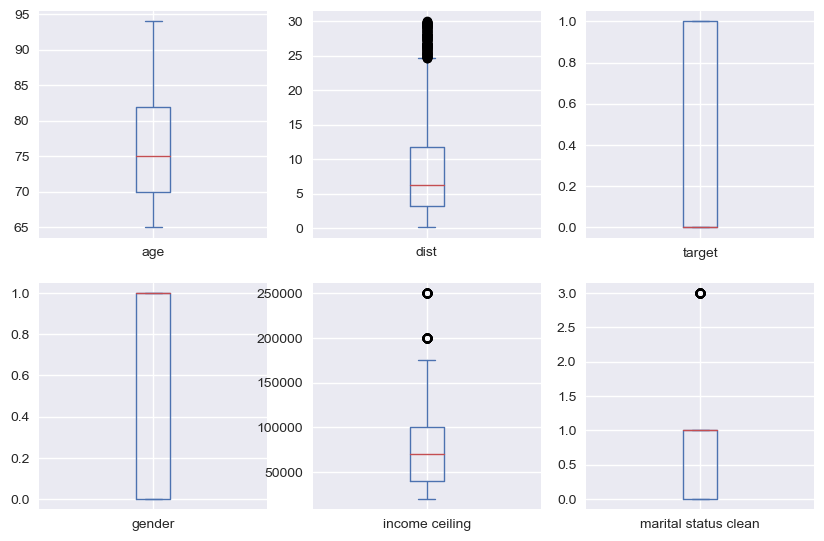

In [ ]:
plt.style.use('seaborn')
newData.plot(kind='box',subplots=True ,layout=(3,3),sharex=False , sharey=False , figsize =(10,10))
plt.show()

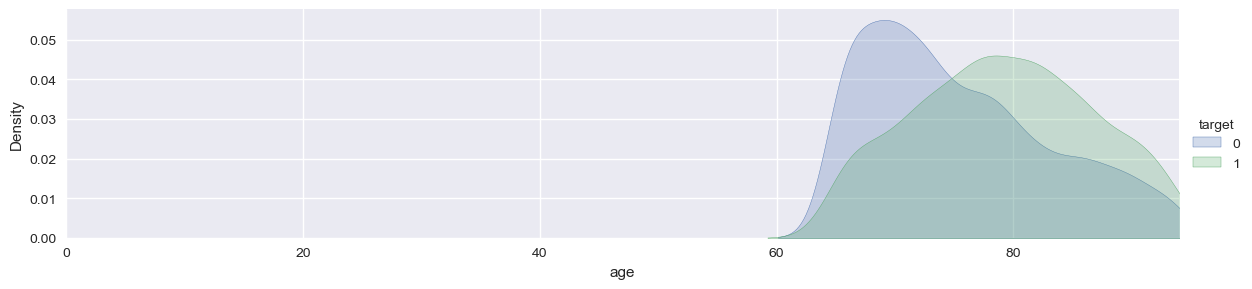

In [ ]:
fig = sns.FacetGrid(newData, hue="target",aspect=4)
fig.map(sns.kdeplot,'age',shade= True)
oldest = newData['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()